# Introduction & Installation

This notebook gives a short overview of the Pyhton package <i> gravipy </i>, a Tensor Calculus Package for General Relativity Calculations in Python. Apart from a regular Pyhton installation, the metapackage <i> sympy </i> is required, for <i> gravipy </i> to run. Both packages are easily installable by using the package-managment system <i> pip </i>. <br>

After installation, start an Ipython notebook (or use Ipython in spyder) and import the <i> gravipy </i> package. For better visualisation of the output a pretty printing option is added: 

In [1]:
from gravipy import *
init_printing()

# Define a Metric Tensor

As a first step, we need to definde a metric tensor g and a corresponding coordinate system resp. four-vector x. Here we take the simplest solution of EInstein's field equations, the Schwarzschild solution. The definition is taken from the documentation included in the gravipy installation, available <a href="https://pypi.org/project/GraviPy/">here</a>

In [2]:
t, r, theta, phi, M = symbols('t, r, \\theta, \phi, M') # define some symbolic variables
x = Coordinates('\chi', [t, r, theta, phi]) # create a four-vector of coordinates object instantiating the Coordinates class
Metric = diag(-(1-2*M/r), 1/(1-2*M/r), r**2, r**2*sin(theta)**2) # define a matrix of a metric tensor components  
g = MetricTensor('g', x, Metric) # create a metric tensor object instantiating the MetricTensor class

After the definition, one could check the structure of the metric tensor g, in both forms, covariant (with positive sign) and contravariant (with negative sign).

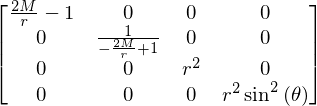

In [3]:
g(All,All) #Covariant metric Tensor (Schwarzschild Solution)

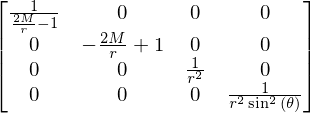

In [4]:
g(-All,-All) #Contravariant metric Tensor (Schwarzschild Solution)

# Calculating the Riemann Tensor

Having now computed the metric tensor (with all non diagonal components being 0 in this metric), we can now calculate the Christoeffl-Symbols (mostly refered to as Gamma), using the subclass <i> Christoffel </i> of the gravipy Tensor Class.

In [5]:
Ga = Christoffel('Ga', g)

Christoffel symbols itself are covariant derivatives of the metric tensor, but they are not tensors themselves. However, they are an important step towards the determination of the Riemann Tensor. Gravipy can output the various components of the Christoffel object, for example:

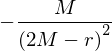

In [6]:
Ga(2,2,2)

The Riemann Tensor is finally constructed by yet another derivation of the Christoffel symbols, and can be calculated easily by

In [7]:
Rm = Riemann('Rm', g)

The Riemann Tensor is a tensor of 4th order (basically a matrix buid of matrices), where all componets look as following

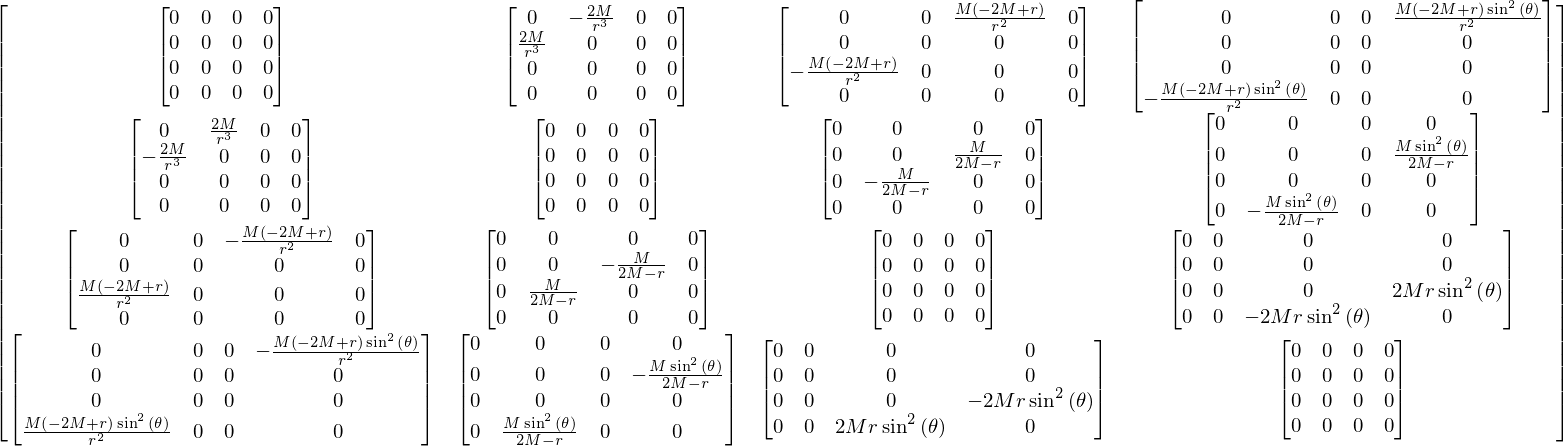

In [8]:
Rm(All, All, All, All)

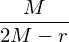

In [9]:
Rm(2,3,2,3)

# No Mass, no Curvature

Most elements in this Riemann Tensor are zeroes. In an tensor contraction you can calculate the Einstein Tensor (product of Ricci Tensor and scalar), which are both 0 in our case.

In [10]:
Ri = Ricci('Ri', g)
Ri.scalar()

Hence the Einstein Tensor is 0 in all components as well. This is the vacuum solution (in the abcence of all matter) of Einstein's Equations: a completlely flat space-time!

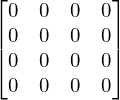

In [11]:
G = Einstein('G', Ri)
display(G(All,All))

We have a completley flat space time! Below you can see the simplest form of Einstein's Field Equation(s), with the Einstein Tensor <i> G </i> on the left-hand side, and the stress-energy-momentum tensor <i> T </i> on the right-hand side. When there is pure vacuum with no energy (or mass) inside it, <i> T </i> is 0 ans so G hs to be 0 as well.

![alt text](https://s0.wp.com/latex.php?latex=%5Cboxed%7BG_%7B%5Cmu%5Cnu%7D%3D%5Cdfrac%7B8%5Cpi+G%7D%7Bc%5E4%7DT_%7B%5Cmu%5Cnu%7D%7D&bg=f9f7e1&fg=000000&s=0&zoom=2 "Final_Einstein_Equations")

# Geodesics

Apart from tensors, <i> gravipy </i> can also calculate geodesics, the generalization of a straihgt line (shortest distance in 4-dimensional spacetime) in general relativity. All geodesics are parameterized by $\tau$, the world line parameter.

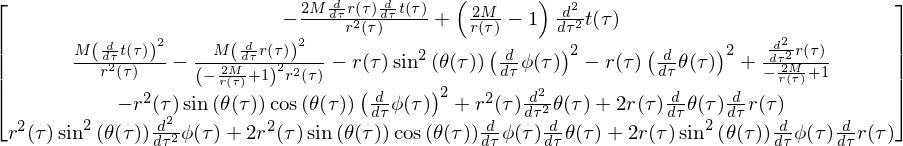

In [13]:
tau = Symbol('\\tau')
w = Geodesic('w', g, tau)
w(All).transpose()

Finally, <i> gravipy </i> provides help functions for all classes/subclasses, including at least one example. 

In [12]:
help(Riemann)

Help on class Riemann in module gravipy.tensorial:

class Riemann(Tensor)
 |  Represents a class of Riemann Tensors.
 |  
 |  Parameters
 |  ==========
 |  
 |  symbol : python string - name of the Riemann Tensor
 |  metric : GraviPy MtricTensor object
 |  
 |  Examples
 |  ========
 |  
 |  Define and calculate some components of the Riemann Curvature Tensor
 |  for the Schwarzschild Metric:
 |  
 |  >>> from gravipy import *
 |  >>> t, r, theta, phi = symbols('t, r, \\theta, \phi')
 |  >>> chi = Coordinates('\chi', [t, r, theta, phi])
 |  >>> M = Symbol('M')
 |  >>> Metric = diag(-(1 - 2 * M / r), 1 / (1 - 2 * M / r), r ** 2,
 |  ...                  r ** 2 * sin(theta) ** 2)
 |  >>> g = MetricTensor('g', chi, Metric)
 |  >>> Rm = Riemann('Rm', g) # doctest: +IGNORE_EXCEPTION_DETAIL
 |  Traceback (most recent call last):
 |  GraviPyError: 'Christoffel object for metric g is required'
 |  >>> Ga = Christoffel('Ga', g)
 |  >>> Rm = Riemann('Rm', g)
 |  >>> Rm(1, -3, -1, 3)
 |  M*(-2*M 

This brief introduction is based on <a href="https://arxiv.org/abs/1703.09738">Birkandan et al., 2018</a> and the integrated tutorial, which is downloadable <a href="https://pypi.org/project/GraviPy/">here</a>. For further use of gravipy (i.e. with Kerr metric), possibly in combination with SageMath, I refer to the paper mentioned above. 